For the sake of making all of the automated graphing tools work, please only extract 3 days of data at a time. i.e. (April 20-22, April 15-17). These data only go back as far as March 24. You are welcome to extract the whole date frame if you want to see the Data frame populate all of the data, but my subplot graphing systems will not work with large datasets.
The current date range set below should work for every cell, so I would recommend running it as is first.  <b>Please read all comments.</b>

In [1]:
import requests 
import re
import pandas as pd
from datetime import date, timedelta
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
start_date = date(2023, 1, 28)
end_date   = date(2023, 3, 11)
delta      = timedelta(days=1) #this section sets the dates that you want to extract data

date_range = []
temp_Date = start_date
while temp_Date <= end_date:
    date_range.append(str(temp_Date))
    temp_Date += delta

playerList = pd.read_excel('newround_tokens.xlsx') #Reads the token file that holds personal tokens

url = 'https://api.ouraring.com/v2/usercollection/sleep' 
params= { 
    'start_date': str(start_date),
    'end_date'  : str(end_date + delta) 
}

response_list = []
OuraData = {}
nameList = []

for player in playerList.values:
    nameList.append(player[0])
    name  = player[0]
    token = player[1]
    headers = { 
    'Authorization': 'Bearer ' + str(token)
    }

    response = requests.request('GET', url, headers=headers, params=params) 
    response_list.append(response.text)
#this section of code accesses the data in OURA via an API that utilizes requests
   
with open ('response.text', 'w') as f:
    json.dump(response_list, f, indent=4, separators=(',',': '))
    f.close() #this section creates the text file that contains all of the data
print('Done')

Done


In [3]:
#Wait until the code above prints "done" to continue
with open('response.text','r') as f:
    data = f.read()
print('Done')

Done


In [4]:
import json
import pandas as pd
res = json.loads(data) #json converts data structures contained within a string to the data structures
#every 'data' is a new person in new_res

new_res = []
for c in range(0,len(res)):
    new = json.loads(res[c])
    new_res.append(new) #second iteration to clean a second layer of data that is enclosed in a string

#we need new_res[count0-13]['data']
#print(new_res[0]['data'])
print('Done')

Done


In [5]:
record = []
count = 0
for i in range(0,len(new_res)):
    record.append(new_res[count]['data'])
    count +=1
#record is a list of all each player's data, with the outer 2 layers removed ('data'). It is 14 long

df_temp = pd.DataFrame()
df = pd.DataFrame()

for people in enumerate(record):
    for instance in people[1]:
        for key in instance:
            if key == "readiness" or key == "heart_rate" or key == "hrv": #these keys break the df
                pass
            else:
                if key == 'total_sleep_duration' or key == 'time_in_bed' or key == 'rem_sleep_duration' or key == 'deep_sleep_duration':
                    df_temp[key] = [instance[key]/60]
                else:
                    df_temp[key] = [instance[key]]

        df_temp['participant'] = nameList[people[0]]
        df = pd.concat([df,df_temp],axis=0)
        
#dataframe has been created and populated with all of the data
df
df.to_csv('OURA1.csv')

In [6]:
df['day'].dtype

dtype('O')

In [7]:
new_df=df.groupby(['day','participant'])['total_sleep_duration'].sum()
new_df

day         participant
2023-01-28  102            588.0
            104            285.5
            105            566.5
            107            431.0
            108            452.0
                           ...  
2023-03-09  113            386.0
2023-03-10  108            425.0
            109            525.5
            112            243.0
            113            386.0
Name: total_sleep_duration, Length: 311, dtype: float64

In [8]:
#df['day'].dtype
df['day'].iloc[1].split('-')

['2023', '01', '28']

In [9]:
df.drop(['bedtime_start', 'bedtime_end','readiness_score_delta','sleep_score_delta'], axis=1)
#dropping irrelevant columns

,id,average_breath,average_heart_rate,average_hrv,awake_time,day,deep_sleep_duration,efficiency,latency,light_sleep_duration,...,movement_30_sec,period,rem_sleep_duration,restless_periods,sleep_phase_5_min,sleep_algorithm_version,time_in_bed,total_sleep_duration,type,participant
0,56b52c62-0f90-4ae1-864f-aabcd189c487,13.375,61.125,55,9360,2023-01-28,122.5,78,270,16560,...,2112143231211111111112111111111111111111111111...,1,164.5,328,4221111122142113222242221112222142212421111123...,None,719.0,563.0,long_sleep,105
0,4a0cb9ef-39bf-494e-bd04-e16eb41bb2fb,13.375,61.125,None,3210,2023-01-28,0.0,6,0,210,...,4444443433222121234333222332222222212121211112...,2,0.0,7,442444444444,None,57.0,3.5,sleep,105
0,23ee965c-cbf8-4914-900b-f4e2ecff07a3,14.000,69.375,64,6930,2023-01-29,91.5,81,660,20310,...,3321311131123322321111111111211111211111111212...,1,61.5,395,4412221221222211114222222221111122222111222324...,None,607.0,491.5,long_sleep,105
0,64eb76fa-295f-443b-817c-704c060a4188,13.000,62.875,59,4500,2023-01-30,100.0,87,930,17100,...,3222122212222212221213111111133211111111111111...,0,111.0,326,4444111111111111111133222242222222221222223334...,None,571.0,496.0,long_sleep,105
0,956c7259-8234-4e9d-b39b-5d15914ce8f2,13.375,63.625,43,1500,2023-01-31,56.5,95,390,16890,...,2212211321111111111111121111121111111111112111...,0,120.0,404,4412211222222221222242222222222223333322222221...,None,483.0,458.0,long_sleep,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4980f698-c3b6-4762-9855-069e9f909240,17.375,67.625,None,1560,2023-02-28,0.0,7,0,120,...,2233332333331132331112111111221212111123321121...,0,0.0,3,442441,None,28.0,2.0,sleep,107
0,a2f6a66a-faa6-412f-9a29-d1f12aff0b68,16.875,61.500,125,2550,2023-02-28,172.0,90,1770,8850,...,3211111111112111111121211221111212111111111223...,1,64.0,122,4444442221111111111232211111142212111122122122...,None,426.0,383.5,long_sleep,107
0,474b9827-a91a-4bb2-b1ab-ef427048f9c2,16.875,61.500,90,630,2023-02-28,0.0,5,0,30,...,3321111133221122211112,3,0.0,1,411,None,11.0,0.5,sleep,107
0,820c2698-3323-40a5-a747-5327bf1d00eb,16.500,60.375,148,2100,2023-03-01,268.5,94,300,7140,...,2222221111111111211111111111111111111111111111...,1,119.5,194,4421111111133211111111111111111111111112314221...,None,542.0,507.0,long_sleep,107


In [10]:
df['average_breath'].dtype

dtype('float64')

In [11]:
#sns.pairplot(df[['average_breath','average_heart_rate','deep_sleep_duration']])
sns.pairplot(df)

#sns.scatterplot(df,x='average_breath',y='average_heart_rate')

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Error in callback <function _draw_all_if_interactive at 0x0000026FDDE3FEC0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026FDED514E0> (for post_execute):


KeyboardInterrupt: 

[Text(0.5, 0, 'Participant'),
 Text(0, 0.5, 'Total Sleep Duration (min)'),
 Text(0.5, 1.0, 'Total Sleep Duration for Participants')]

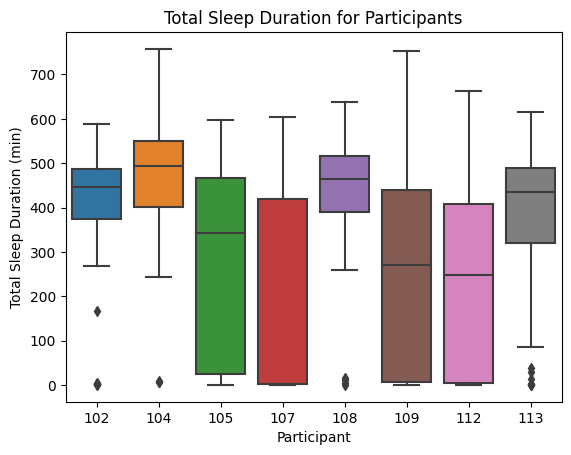

In [ ]:
#date_total_sleep = df.groupby('participant')['day'].mean()
#date_total_sleep
#total sleep duration for each participant

sleep_person = sns.boxplot(x=df['participant'],y=df['total_sleep_duration'])
#sleep_person = sns.histplot(x=df['participant'],y=df['total_sleep_duration']) 
#the histplot displays the data a little differently
sleep_person.set(xlabel ="Participant", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration for Participants')

[Text(0.5, 0, 'Participant'),
 Text(0, 0.5, 'Rem Sleep Duration (min)'),
 Text(0.5, 1.0, 'REM Sleep Duration for Participants')]

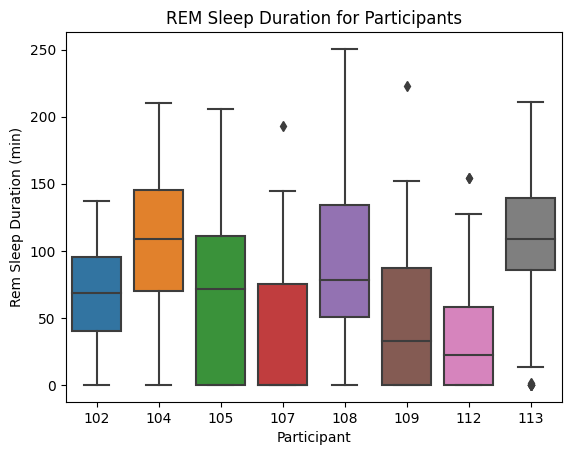

In [ ]:
sleep_person = sns.boxplot(x=df['participant'],y=df['rem_sleep_duration'])
#sleep_person = sns.histplot(x=df['participant'],y=df['rem_sleep_duration']) 
sleep_person.set(xlabel ="Participant", ylabel = "Rem Sleep Duration (min)", title ='REM Sleep Duration for Participants')

[Text(0.5, 0, 'Participant'),
 Text(0, 0.5, 'Light Sleep Duration (min)'),
 Text(0.5, 1.0, 'Light Sleep Duration for Participants')]

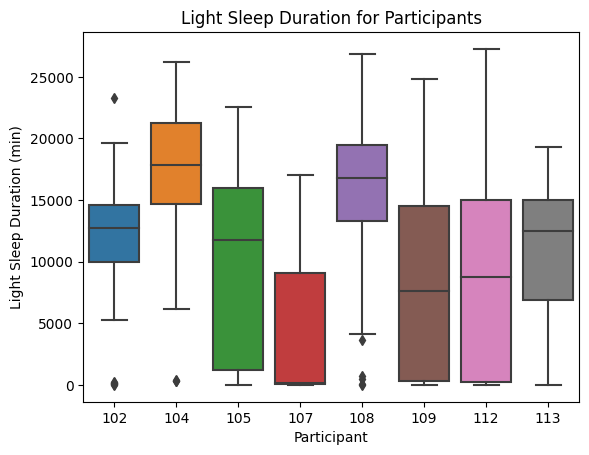

In [ ]:
sleep_person = sns.boxplot(x=df['participant'],y=df['light_sleep_duration'])
#sleep_person = sns.histplot(x=df['participant'],y=df['light_sleep_duration']) 
sleep_person.set(xlabel ="Participant", ylabel = "Light Sleep Duration (min)", title ='Light Sleep Duration for Participants')

[Text(0.5, 0, 'Participant'),
 Text(0, 0.5, 'Deep Sleep Duration (min)'),
 Text(0.5, 1.0, 'Deep Sleep Duration for Participants')]

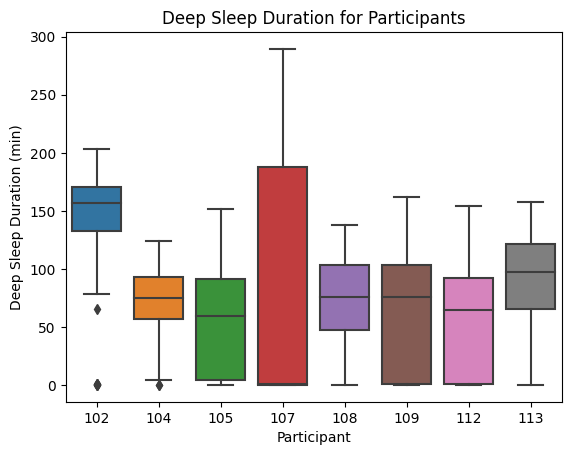

In [ ]:
sleep_person = sns.boxplot(x=df['participant'],y=df['deep_sleep_duration'])
#sleep_person = sns.histplot(x=df['participant'],y=df['deep_sleep_duration']) 
sleep_person.set(xlabel ="Participant", ylabel = "Deep Sleep Duration (min)", title ='Deep Sleep Duration for Participants')

[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Total Sleep Duration (min)'),
 Text(0.5, 1.0, 'Average Total Sleep Duration Per Day')]

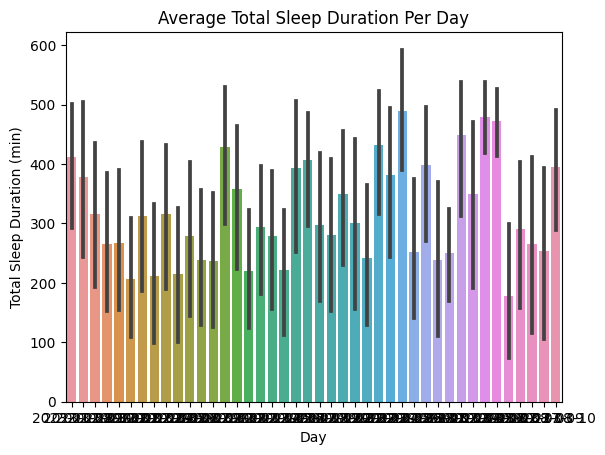

In [ ]:
seg1 = df.groupby(['day','participant'])['total_sleep_duration'].mean()
daily_sleep = sns.barplot(x=df['day'],y=df['total_sleep_duration'])
daily_sleep.set(xlabel ="Day", ylabel = "Total Sleep Duration (min)", title ='Average Total Sleep Duration Per Day')

In [ ]:


player1 = df.loc[df['participant']==114] #this identifies the person you want to look at
player2 = df.loc[df['participant']==116]
player3 = df.loc[df['participant']==117]
player4 = df.loc[df['participant']==119]
player5 = df.loc[df['participant']==120]
player6 = df.loc[df['participant']==121]
player7 = df.loc[df['participant']==122]
player8 = df.loc[df['participant']==124]
player9 = df.loc[df['participant']==125]
player0 = df.loc[df['participant']==126]
player01 = df.loc[df['participant']==127]

#You can print any of these by commenting out every line after it. Right now, 122 will print

p114 = sns.barplot(x=player1['day'],y=player1['total_sleep_duration']) #This graph puts the days on the x axis and the total sleep duration on the y axis
p114.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 114')
p116 = sns.barplot(x=player2['day'],y=player2['total_sleep_duration'])
p116.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 116')
p117 = sns.barplot(x=player3['day'],y=player3['total_sleep_duration'])
p117.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 117')
p119 = sns.barplot(x=player4['day'],y=player4['total_sleep_duration'])
p119.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 119')
p120 = sns.barplot(x=player5['day'],y=player5['total_sleep_duration'])
p120.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 120')
p121 = sns.barplot(x=player6['day'],y=player6['total_sleep_duration'])
p121.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 121')
p122 = sns.barplot(x=player7['day'],y=player7['total_sleep_duration'])
p122.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 122')
#p124 = sns.barplot(x=player8['day'],y=player8['total_sleep_duration'])
#p124.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 124')
#p125 = sns.barplot(x=player9['day'],y=player9['total_sleep_duration'])
#p125.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 125')
#p126 = sns.barplot(x=player0['day'],y=player0['total_sleep_duration'])
#p126.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 126')
#p127 = sns.barplot(x=player01['day'],y=player01['total_sleep_duration'])
#p127.set(xlabel ="Date", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration per day Participant 127')

ValueError: min() arg is an empty sequence

In [ ]:
#This section will create plots to represent each participant's sleep for each day.
#DO NOT RUN FOR MORE THAN 4 DAYS OF DATA wITHOUT - USE THE NEXT CELL INSTEAD to run 4+ days
day1 = df['day']
length = len(df['day'].unique())
fig, axes = plt.subplots(2, length)
#I observed that you have to make an additional row than you need, otherwise it will produce an index error
fig.subplots_adjust(hspace=0.35, wspace=0.3)
fig.set_size_inches(13, 6)
count = 0
for days in day1.unique():
    temp = df.loc[df['day']==days]
    temp1 = sns.barplot(x=temp['participant'], y = temp['total_sleep_duration'], ax=axes[0, count])
    fvar = df['day'].unique()[count]
    temp1.set(xlabel ="Participant", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration on %s'%(fvar))
    count +=1
#These graphs exclude participants with no data for the given day

In [ ]:
#This cell is the same graph as the above cell, but works for any day within the duration you extracted
temp = df.loc[df['day']=="2023-04-20"] #Change the date for the appropriate graph you are desiring
fvar = "2023-04-20"
temp1 = sns.barplot(x=temp['participant'], y = temp['total_sleep_duration'])
temp1.set(xlabel ="Participant", ylabel = "Total Sleep Duration (min)", title ='Total Sleep Duration on %s'%(fvar))


In [ ]:
#THIS CODE WILL NOT WORK FOR SETS OF DATA LARGER THAN 3 DAYS
person = df.loc[df['participant']==114]
#Change the participant number above to get data for a different participant
phase = person['sleep_phase_5_min'][0]
day = person['day']
phase_list = []
for i in phase: 
    phase_list.append(i)
day_list = []
for i in day:
    day_list.append(i)
new_data1 = {}
count=0
for ind in new_list1:
    for n in ind:
        new_data1[count] = [int(n) for n in ind]
    count+=1
fig, axes = plt.subplots(2, 3)
#I observed that you have to make an additional row than you need, otherwise it will produce an index error. I don't know why
fig.subplots_adjust(hspace=0.35, wspace=0.45)
fig.set_size_inches(13, 6)

count = 0
for i in phase:
    phase_df = pd.DataFrame()
    phase_df['sleep_phase'] = new_data1[count]
    phase_graph = sns.lineplot(x=phase_df.index,y=phase_df['sleep_phase'], ax=axes[0, count])
    fvar = person['participant'].unique()
    fvar2 = day_list[count]
    phase_graph.set(xlabel ="5 Minute Interval", ylabel = "Sleep Phase", title ='Sleep Phase for %s on %s'%(fvar,fvar2))
    
    count += 1
sleep_phase = person['sleep_phase_5_min'].unique()
#sleep_phase

In [ ]:
#This graphs all of the participant's sleep instances on top of each other for a 3 days
#Change the participant number in the cell above to get different data on this graph
fig, axes = plt.subplots(1, 1)
day_str = ''
for i in day_list:
    day_str += i+', '
print(day_list[0])
count = 0
for i in phase:
    phase_df = pd.DataFrame()
    phase_df['sleep_phase'] = new_data1[count]
    phase_graph = sns.lineplot(x=phase_df.index,y=phase_df['sleep_phase'])
    fvar2 = day_str
    phase_graph.set(xlabel ="5 Minute Interval", ylabel = "Sleep Phase", title ='Sleep Phase for %s'%(fvar2))
    plt.legend(labels=[day_list[0],day_list[1],day_list[2]])
    count += 1